# Kaggle Competition: Novozymes Enzyme Stability Prediction, Help identify the thermostable mutations in enzymes

by: Tianxiong Yu, upload at <b><a href="https://github.com/Lecter314/MLDM_2022_YuTianxiong_EEP/tree/main/Novozymes%20Enzyme%20Stability%20Prediction">github_MLDM_2022_YuTianxiong_EEP</a></b>

* Goal of the Competition

    * Enzymes are proteins that act as catalysts in the chemical reactions of living organisms. The goal of this competition is to **predict the thermostability of enzyme variants**. The experimentally measured thermostability (melting temperature) data includes natural sequences, as well as engineered sequences with single or multiple mutations upon the natural sequences.

* Prize Money: \$ 25,000

* Timeline:
    * September 21, 2022 - Start Date;
    * December 27, 2022 - Entry Deadline. You must accept the competition rules before this date in order to compete;
    * December 27, 2022\* - Team Merger Deadline. This is the last day participants may join or merge teams;
    * January 3, 2023 - Final Submission Deadline;
    
All deadlines are at 11:59 PM UTC on the corresponding day unless otherwise noted. The competition organizers reserve the right to update the contest timeline if they deem it necessary.

See in https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/overview.

## 1 Intro

### 1.1 Competition background

In this competition, you are asked to develop models that can predict the ranking of protein stability (as measured by melting point, $t_m$) after single-point amino acid mutation and deletion.

The below is from https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/overview/description, and formated by <b><a href="https://www.kaggle.com/code/dschettler8845/novo-esp-eda-baseline">@dschettler8845</a></b>.

<b><a href="https://www.britannica.com/science/enzyme">Enzymes</a></b> are <b><a href="https://www.britannica.com/science/protein">proteins</a></b> that act as <b><a href="https://www.britannica.com/science/catalyst">catalysts</a></b> in the chemical reactions of living organisms. 

<b><a href="https://www.novozymes.com/en">Novozymes</a></b> finds enzymes in nature and optimizes them for use in industry. 
* In industry, enzymes replace chemicals and accelerate production processes. 
* They help our customers make more from less, while saving energy and generating less waste. 
* Enzymes are widely used in laundry and dishwashing detergents where they remove stains and enable low-temperature washing and concentrated detergents. 
* Other enzymes improve the quality of bread, beer and wine, or increase the nutritional value of animal feed. 
* Enzymes are also used in the production of biofuels where they turn starch or cellulose from biomass into sugars which can be fermented to ethanol. 

These are just a few examples as we sell enzymes to more than <b>40 different industries</b>. Like enzymes, microorganisms have natural properties that can be put to use in a variety of processes. 
* Novozymes supplies a range of microorganisms for use in agriculture, animal health and nutrition, industrial cleaning and wastewater treatment.

<b><mark>However, many enzymes are only marginally stable, which limits their performance under harsh application conditions.</mark></b> 
* Instability also decreases the amount of protein that can be produced by the cell. 
* Therefore, the development of efficient computational approaches to predict protein stability carries enormous technical and scientific interest. 

Computational protein stability prediction based on physics principles have made remarkable progress thanks to advanced physics-based methods such as <b><a href="https://foldxsuite.crg.eu/">FoldX</a></b>, <b><a href="https://www.rosettacommons.org/software">Rosetta</a></b>, and others. Recently, many machine learning methods were proposed to predict the stability impact of mutations on protein based on the pattern of variation in natural sequences and their three dimensional structures. More and more protein structures are being solved thanks to the recent breakthrough of <b><a href="https://www.deepmind.com/research/highlighted-research/alphafold">AlphaFold2</a></b>. <b><mark>However, accurate prediction of protein thermal stability remains a great challenge.</mark></b>

**Alphafold2 prediction of wildtype 3d structure (from @cdeotte)**

<center><img src="https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/Sep-2022/test-image.png"></center>

In [1]:
import py3Dmol 
with open("wildtype_structure_prediction_af2.pdb") as ifile:
    protein = "".join([x for x in ifile])
view = py3Dmol.view(query="pdb:1DIV", width=800, height=600)
view.addModelsAsFrames(protein)
style = {"cartoon": {"color": "spectrum"},"stick":{}}
view.setStyle({"model": -1},style) 
view.zoom(0.12)
view.rotate(235, {"x":0,"y":1,"z":1})
view.spin({"x":-0.2,"y":0.5,"z":1},1)
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### 1.2 Related knowledge needed in this work

Overall we're not specialized in biology, there's no need to examine each mechanism in detail. From here we only highlight some fundamental knowledge related to the topic so as to get the flavor and work more smoothly on further parts. And if we encounter problems afterwords, we'll move back for more ideas.

* **Proteins** are large, complex molecules that play many critical roles in the body. They do most of the work in cells and are required for the structure, function, and regulation of the body’s tissues and organs (see: https://medlineplus.gov/genetics/understanding/howgeneswork/protein/);

* Protein is made from twenty-plus basic building blocks called **amino acids** (see: https://www.hsph.harvard.edu/nutritionsource/what-should-you-eat/protein/);

* An **amino acid** is an organic molecule that is made up of a basic amino group (−NH2), an acidic carboxyl group (−COOH), and an organic R group (or side chain) that is unique to each amino acid (see: https://www.britannica.com/science/amino-acid);
    * Amino Acid structure (particularly the R-Group) is determined by a particular codon (triplet of Nucleotides).

* There are only 5 types of **nucleotides** (see: https://www.genome.gov/genetics-glossary/Nucleotide);
    * 3 are found in both DNA and RNA (Adenine (A), Cytosine (C), Guanine (G));
    * Thymine (T) is also used in DNA while Uracil (U) is used in RNA.


* Graphically explanation

**Image comparing proteins with language**
<center><img src="https://www.ptglab.com/media/3301/1503677_complexity-of-proteins-blog-diagram_v1.jpg"></center>


**Twenty different types of side chains**
</center><img src="https://personal.psu.edu/staff/m/b/mbt102/bisci4online/chemistry/charges.gif"></center>


**How it works (sorta)**
</center><img src="https://cdn.britannica.com/80/780-050-CC40AEDF/Synthesis-protein.jpg"></center>

Summary: To make a **protein** we use instructions (DNA/RNA, Nucleotides), to build up the protein chain by adding one **amino acid** at a time (in our instructions each codon (triplet of nucleotides) tells us what amino acid comes next). At some point the instructions will also tell us when to stop (stop codon). (see https://www.kaggle.com/code/dschettler8845/novo-esp-eli5-performant-approaches-lb-0-451)

## 2 Import related libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data_old = pd.read_csv("train.csv")
data_update = pd.read_csv("train_updates_20220929.csv")

### 2.1 Dataset Description
In this competition, you are asked to develop models that can predict the ranking of protein thermostability (as measured by melting point, tm) after single-point amino acid mutation and deletion.

For the training set, the protein thermostability (experimental melting temperature) data includes natural sequences, as well as engineered sequences with single or multiple mutations upon the natural sequences. The data are mainly from different sources of published studies such as Meltome atlas—thermal proteome stability across the tree of life. Many other public datasets exist for protein stability; please see the competition Rule 7C for external data usage requirements. There are also other publicly available methods which can predict protein stabilities such as ESM, EVE and Rosetta etc., without using the provided training set. These methods may also be used as part of the competition.


* Rule 7C (COMPETITION DATA, C. External Data) You may use data other than the Competition Data (“External Data”) to develop and test your Submissions. However, you will ensure the External Data is publicly available and equally accessible to use by all participants of the Competition for purposes of the competition at no cost to the other participants. The ability to use External Data under this Section 7.C (External Data) does not limit your other obligations under these Competition Rules, including but not limited to Section 11 (Winners Obligations).

The test set contains experimental melting temperature of over 2,413 single-mutation variant of an enzyme (GenBank: KOC15878.1), obtained by Novozymes A/S. The amino acid sequence of the **wild type** is:

<b>VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK</b> 

### 2.2 file description


* **train.csv** - the training data, with columns as follows:

    * seq_id: unique identifier of each protein variants
    * protein_sequence: amino acid sequence of each protein variant. The stability (as measured by tm) of protein is determined by its protein sequence. (Please note that most of the sequences in the test data have the same length of 221 amino acids, but some of them have 220 because of amino acid deletion.)
    * pH: the scale used to specify the acidity of an aqueous solution under which the stability of protein was measured. Stability of the same protein can change at different pH levels.
    * data_source: source where the data was published
    * tm: target column. Since only the spearman correlation will be used for the evaluation, the correct prediction of the relative order is more important than the absolute tm values. (Higher tm means the protein variant is more stable.)


* **train_updates_20220929.csv** - corrected rows in train, please see this forum post for details


* **test.csv** - the test data; your task is to predict the target tm for each protein_sequence (indicated by a unique seq_id)


* **sample_submission.csv** - a sample submission file in the correct format, with seq_id values corresponding to test.csv


* **wildtype_structure_prediction_af2.pdb** - the 3 dimensional structure of the enzyme listed above, as predicted by AlphaFold

In [3]:
data_old.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [4]:
data_update.head()

,seq_id,protein_sequence,pH,data_source,tm
0,69,NaN,NaN,NaN,NaN
1,70,NaN,NaN,NaN,NaN
2,71,NaN,NaN,NaN,NaN
3,72,NaN,NaN,NaN,NaN
4,73,NaN,NaN,NaN,NaN


## 3 Data preprocessing

### 3.1 Substitue old dataset with updated ones


As has been pointed out, there are some data issues in the training data. A file has been added to the Data page which contains the rows that should **not** be used due to data quality issues (2409 rows, with all features marked as NaN), as well as the rows where the pH and tm were **transposed** (25 rows, with corrected features in this dataset).


The original train.csv has not been modified. Please use this file to make adjustments as necessary.

In [5]:
data_update.fillna("Filled for update", inplace=True) # because update will not replace numbers with nan, but that's exact what we need
data_new = data_old.set_index("seq_id")
data_new.update(data_update.set_index("seq_id"))
data_new.replace("Filled for update", np.nan, inplace=True)
data_new.to_csv("data_new.csv")
data_new = data_new.reset_index()

In [6]:
data_updated = data_new.copy()
data_updated

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


### 3.2 Consider whether some of the data_source providers are unreliable

In [7]:
data_updated["data_source"].value_counts()

doi.org/10.1038/s41592-020-0801-4    24525
10.1021/acscatal.9b05223               211
10.1016/j.bpc.2006.10.014              185
10.7554/eLife.54639                    151
10.1007/s00253-018-8872-1               84
                                     ...  
10.1074/jbc.M001132200                   1
10.1021/bi00485a004                      1
10.1021/bi9530090                        1
10.1016/0005-2795(77)90166-0             1
10.1002/pro.5560061014                   1
Name: data_source, Length: 324, dtype: int64

In [8]:
# check how much percentage qusetionalbe rows are from NaN source
count = 0
for id in data_update["seq_id"]: 
    count += 1 if id in data_old.loc[data_old["data_source"].isnull() == 1]["seq_id"] else 0

round(count / len(data_update["seq_id"]), 4) # above 98% of qusetionalbe rows are from NaN source

0.9827

In [9]:
# for these NaN source columns, they maybe be considered in lower weight
data_updated["data_source"].isna().sum()

3389

In [10]:
# substitute NaN sources with 0, and denote those with sources are 1. To create a dummy variable
data_updated["data_source"] = data_updated["data_source"].fillna(0)
data_updated["data_source"] = data_updated["data_source"].apply(lambda x: 1 if x != 0 else x)

In [11]:
# adapt same transformation to test dataset
data_test = pd.read_csv("test.csv")
data_test.head()

,seq_id,protein_sequence,pH,data_source
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


In [12]:
# well, all sources in test dataset are labeled...
data_test["data_source"] = data_test["data_source"].fillna(0)
data_test["data_source"] = data_test["data_source"].apply(lambda x: 1 if x != 0 else x)
data_test["data_source"].value_counts()

1    2413
Name: data_source, dtype: int64

### 3.3 Missing values

In 3.2, we bascially deal with "data_source" labels, in this part we're gonna check tha overall dataset with missing numbers, both updated train dataset and test dataset.

In [13]:
# consider the update info, some rows are suggested to be droped
data_updated.isnull().sum()

seq_id                 0
protein_sequence    2409
pH                  2695
data_source            0
tm                  2409
dtype: int64

In [14]:
data_updated.drop(data_updated.loc[data_updated["tm"].isnull() == 1].index, inplace=True)

In [15]:
# further there're still some pH missing
data_updated.isnull().sum()

seq_id                0
protein_sequence      0
pH                  286
data_source           0
tm                    0
dtype: int64

In [16]:
# with no missing values in test dataset
data_test.isnull().sum()

seq_id              0
protein_sequence    0
pH                  0
data_source         0
dtype: int64

In [17]:
# pH in [0, 14], looks fine
data_updated["pH"].describe()

count    28695.000000
mean         6.872467
std          0.793184
min          1.990000
25%          7.000000
50%          7.000000
75%          7.000000
max         11.000000
Name: pH, dtype: float64

In [19]:
# maybe fillna in mode is an appropriate approach
data_updated["pH"].value_counts()

7.00    25509
7.50      419
8.00      377
3.00      250
7.40      189
        ...  
4.10        1
6.10        1
2.81        1
3.14        1
3.60        1
Name: pH, Length: 104, dtype: int64

<ipython-input-20-a4eeebb3f1df>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_updated["pH"])


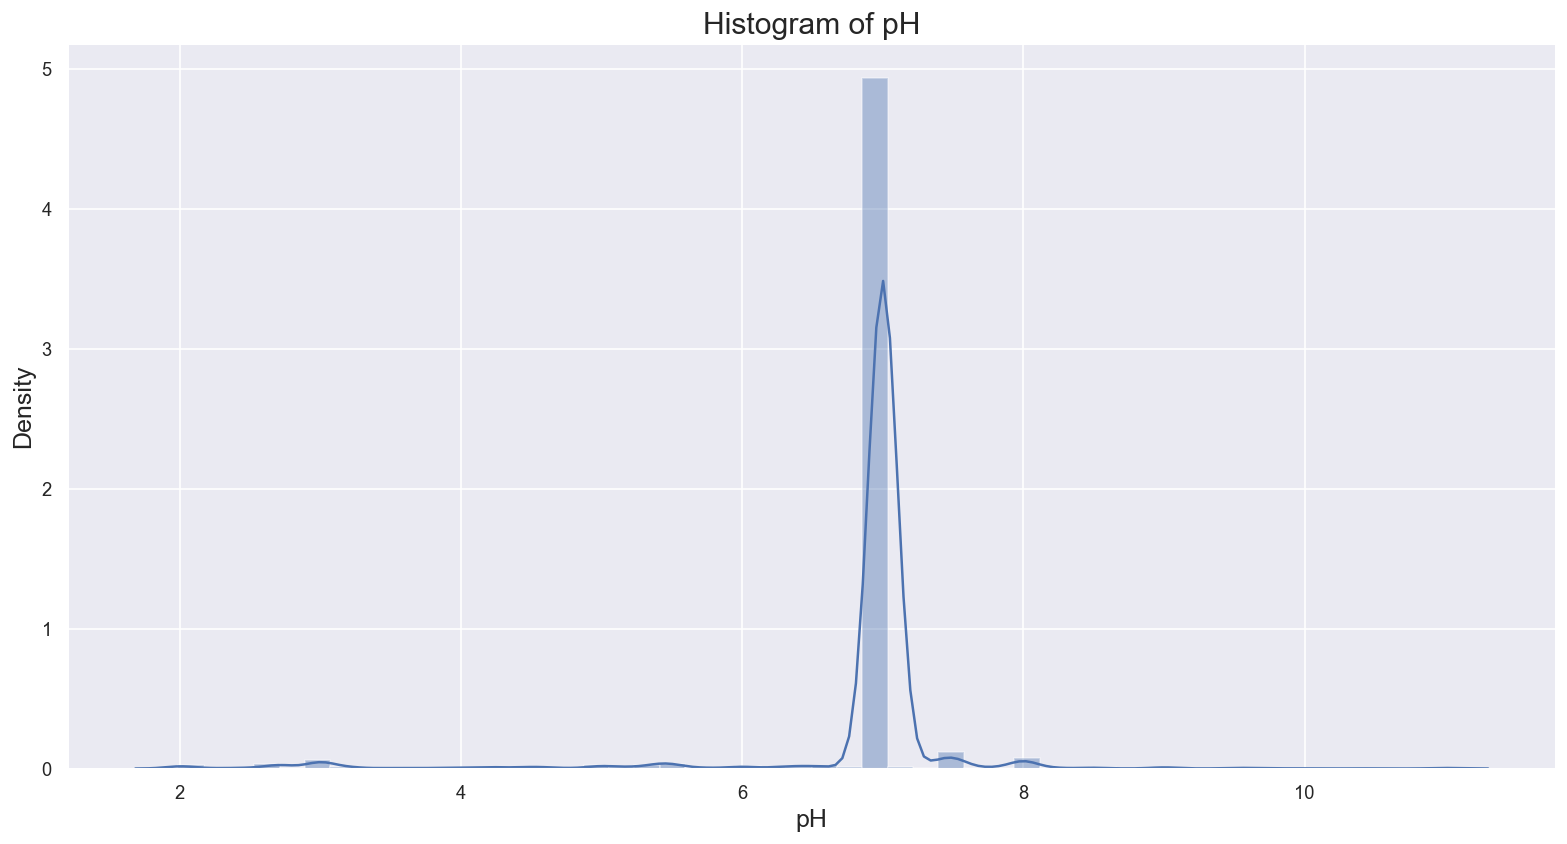

In [20]:
# graphically illstration via histogram
plt.figure(figsize=(16,8), dpi=120)
sns.set()
ax = sns.distplot(data_updated["pH"])
plt.title("Histogram of pH", fontsize=18)
plt.xlabel("pH", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

In [21]:
data_updated["pH"] = data_updated["pH"].fillna(7.00)
data_updated["pH"].value_counts()

7.00    25795
7.50      419
8.00      377
3.00      250
7.40      189
        ...  
4.10        1
6.10        1
2.81        1
3.14        1
3.60        1
Name: pH, Length: 104, dtype: int64

In [22]:
# after that, no missing values
data_updated.isnull().sum()

seq_id              0
protein_sequence    0
pH                  0
data_source         0
tm                  0
dtype: int64

### 3.4 Abnormal values

from here basically focus on pH, because data_sourse is dummy value we defined, protein_sequence is complicate that we'll discuss later, and seq_id is merely an id

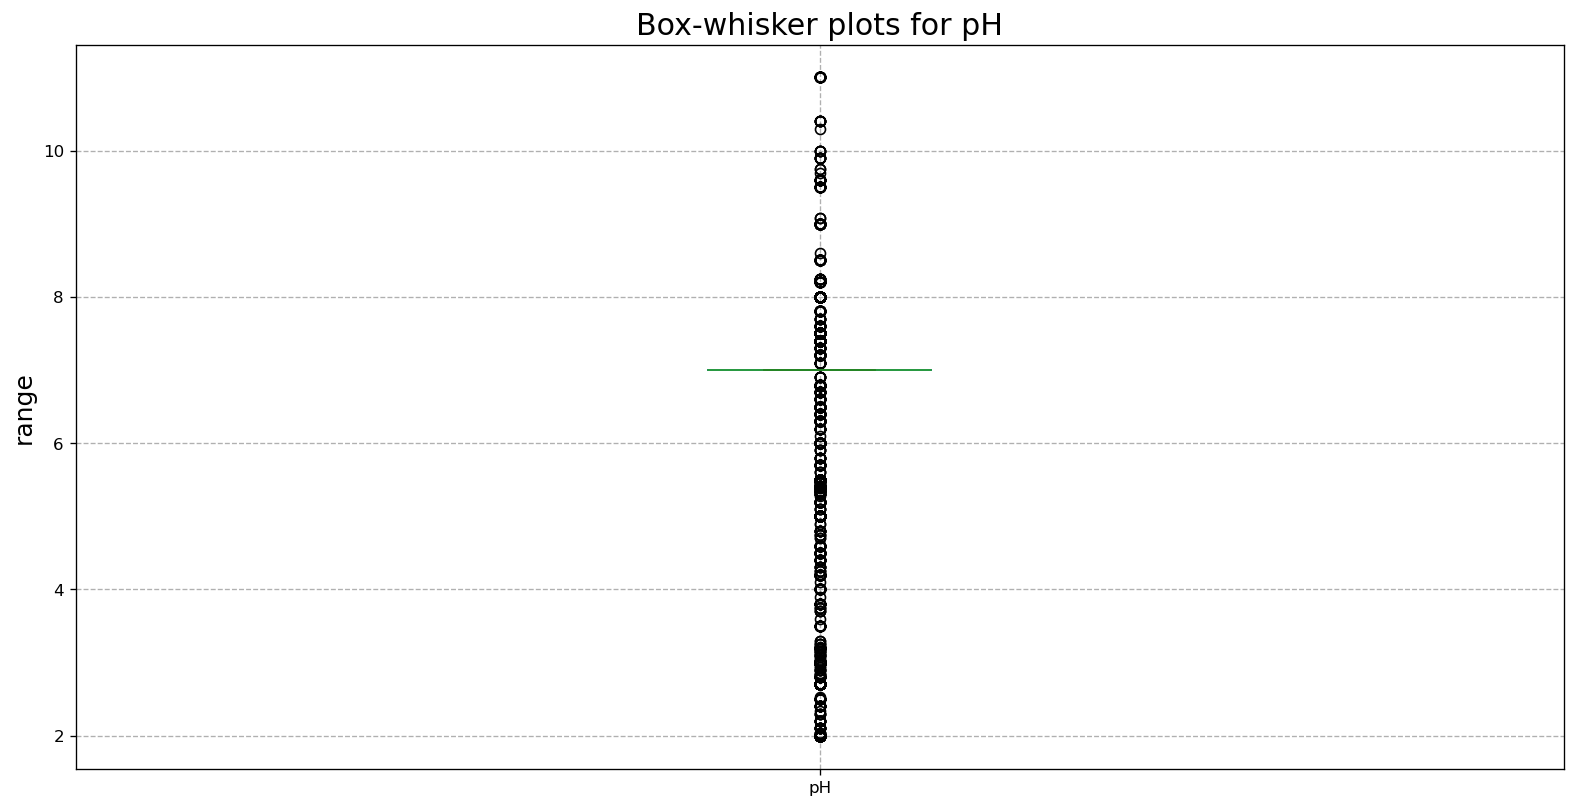

In [18]:
# looks as if pH is not neuture is abnormal, however, is stands in the experimental environment, so no more delete for pH
plt.figure(figsize=(16,8), dpi=120)
data_updated.boxplot(column=["pH"])
plt.grid(linestyle="--")
plt.title("Box-whisker plots for pH", fontsize=18)
plt.ylabel("range", fontsize=15)
plt.show()

### 3.4 Dealing with protein_sequence

It's clearly that there're lots of features beneath hundreds of digits' protein sequence, there're two approaches for feature engineering: frequency for each amino acid, and their relative position etc.

#### 3.4.1 frequency for each amino acid

In [23]:
amino_acid = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'] # there're only 20 different kinds of amino acids
for amino in amino_acid:
    data_updated[amino] = data_updated["protein_sequence"].str.count(amino)
    data_test[amino] = data_test["protein_sequence"].str.count(amino) # same goes for test dataset
data_updated.head()

,seq_id,protein_sequence,pH,data_source,tm,A,C,D,E,F,...,M,N,P,Q,R,S,T,V,W,Y
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,1,75.7,45,1,13,30,13,...,8,5,18,6,25,11,14,37,4,3
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,1,50.5,28,0,10,52,6,...,2,6,8,22,30,14,12,13,3,3
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,1,40.5,50,9,27,32,21,...,6,15,20,25,31,33,30,30,3,16
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,1,47.2,20,5,19,29,12,...,2,9,16,9,10,16,19,14,3,4
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,1,49.5,86,14,78,78,32,...,31,65,128,54,63,148,120,124,16,47


#### 3.4.2 length for protein_sequence

In [24]:
for df in [data_updated, data_test]:
    df["length"] = df["protein_sequence"].apply(lambda x: len(x))

data_updated.head()

,seq_id,protein_sequence,pH,data_source,tm,A,C,D,E,F,...,N,P,Q,R,S,T,V,W,Y,length
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,1,75.7,45,1,13,30,13,...,5,18,6,25,11,14,37,4,3,341
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,1,50.5,28,0,10,52,6,...,6,8,22,30,14,12,13,3,3,286
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,1,40.5,50,9,27,32,21,...,15,20,25,31,33,30,30,3,16,497
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,1,47.2,20,5,19,29,12,...,9,16,9,10,16,19,14,3,4,265
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,1,49.5,86,14,78,78,32,...,65,128,54,63,148,120,124,16,47,1451


#### 3.4.3 different kinds of amino acids

In [25]:
for df in [data_updated, data_test]:
    df["kinds"] = df["protein_sequence"].apply(lambda x: len(set(str(x))))

data_updated.head()

,seq_id,protein_sequence,pH,data_source,tm,A,C,D,E,F,...,P,Q,R,S,T,V,W,Y,length,kinds
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,1,75.7,45,1,13,30,13,...,18,6,25,11,14,37,4,3,341,20
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,1,50.5,28,0,10,52,6,...,8,22,30,14,12,13,3,3,286,19
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,1,40.5,50,9,27,32,21,...,20,25,31,33,30,30,3,16,497,20
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,1,47.2,20,5,19,29,12,...,16,9,10,16,19,14,3,4,265,20
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,1,49.5,86,14,78,78,32,...,128,54,63,148,120,124,16,47,1451,20


#### 3.4.4 relative position for the amino acid

The relative position for amino acid also matters for proteins, as indicated in intro. From here we select most frequent amino acid combinations, from 2-combi to 3-combi, consider in higher situation features will be mostly 0, and the matrix will be too sparse, which is not good for fitting.

In [26]:
# collected by @Alexander_Shumilin, see https://www.kaggle.com/code/alexandershumilin/ideas-on-enzyme-prediction-features-as-char-comb/notebook

# 2 combination
col_2 = ['aa',
 'ae',
 'ag',
 'ai',
 'ak',
 'al',
 'as',
 'av',
 'da',
 'de',
 'dl',
 'ea',
 'ed',
 'ee',
 'eg',
 'ek',
 'el',
 'er',
 'es',
 'ev',
 'ga',
 'ge',
 'gg',
 'gk',
 'gl',
 'gs',
 'gv',
 'ia',
 'il',
 'ka',
 'ke',
 'kk',
 'kl',
 'ks',
 'la',
 'ld',
 'le',
 'lg',
 'li',
 'lk',
 'll',
 'ln',
 'lp',
 'lq',
 'lr',
 'ls',
 'lt',
 'lv',
 'pe',
 'pl',
 'ps',
 'ql',
 'rl',
 'sa',
 'se',
 'sg',
 'sk',
 'sl',
 'sp',
 'ss',
 'st',
 'sv',
 'ta',
 'tl',
 'ts',
 'va',
 've',
 'vl',
 'vs',
 'vv']
# 3 combination
col_3 = ['aaa',
 'aae',
 'aag',
 'aal',
 'aas',
 'aav',
 'aea',
 'aee',
 'ael',
 'agl',
 'ala',
 'ale',
 'alg',
 'alk',
 'all',
 'alr',
 'als',
 'asl',
 'ass',
 'ava',
 'avl',
 'dee',
 'dll',
 'eaa',
 'eae',
 'eal',
 'eea',
 'eee',
 'eek',
 'eel',
 'ekl',
 'ela',
 'ele',
 'elk',
 'ell',
 'erl',
 'esl',
 'evl',
 'ggg',
 'ggs',
 'gla',
 'gll',
 'gsg',
 'gss',
 'kal',
 'kel',
 'kkl',
 'kll',
 'laa',
 'lae',
 'lag',
 'lak',
 'lal',
 'las',
 'ldl',
 'lea',
 'lee',
 'lek',
 'lel',
 'lgl',
 'lka',
 'lke',
 'lkk',
 'lla',
 'lld',
 'lle',
 'llg',
 'llk',
 'lll',
 'llq',
 'llr',
 'lls',
 'llt',
 'llv',
 'lre',
 'lrl',
 'lsa',
 'lse',
 'lsg',
 'lsl',
 'lss',
 'lvl',
 'qll',
 'rll',
 'saa',
 'sal',
 'sas',
 'sgs',
 'sla',
 'sll',
 'sls',
 'ssa',
 'ssg',
 'ssl',
 'sss',
 'tll',
 'vaa',
 'vla',
 'vll']
# 4 combination
col_4 = ['aaaa',
 'aaal',
 'aaas',
 'aaav',
 'aaga',
 'aala',
 'aalg',
 'aall',
 'aavr',
 'aeal',
 'alaa',
 'alal',
 'alea',
 'alga',
 'alke',
 'alla',
 'alle',
 'alll',
 'asss',
 'avaa',
 'deee',
 'eaaa',
 'eaal',
 'eaav',
 'eaek',
 'eala',
 'eale',
 'ealk',
 'eall',
 'ealr',
 'eeal',
 'eeea',
 'eeed',
 'eeee',
 'eeek',
 'eeel',
 'eele',
 'eelk',
 'eell',
 'elae',
 'elar',
 'elee',
 'ella',
 'elle',
 'ellk',
 'erlr',
 'gggg',
 'gggs',
 'gsss',
 'klle',
 'laaa',
 'laal',
 'laek',
 'lael',
 'laks',
 'lala',
 'lall',
 'leaa',
 'leal',
 'leea',
 'leee',
 'leel',
 'lekl',
 'lell',
 'lkal',
 'lkel',
 'lkkl',
 'llaa',
 'llae',
 'llal',
 'llea',
 'llee',
 'llek',
 'llel',
 'llke',
 'llla',
 'llle',
 'llll',
 'lllv',
 'llsa',
 'llsl',
 'lltk',
 'lrlk',
 'lsal',
 'lsll',
 'lssl',
 'lsss',
 'lvll',
 'rlll',
 'saaa',
 'sall',
 'sass',
 'sgse',
 'sgss',
 'slss',
 'ssas',
 'ssgs',
 'ssls',
 'sssa',
 'sssg',
 'sssl',
 'ssss',
 'ssst',
 'vaaa',
 'vlls']

In [27]:
def relative_aa_counts(col, df):
    for aa_combi in col:
        df[aa_combi.upper()] = df["protein_sequence"].str.count(aa_combi.upper())
    return True

In [28]:
for df in [data_updated, data_test]:
    for col in [col_2, col_3]: # adding col_3
        relative_aa_counts(col, df)

In [29]:
data_updated.head()

,seq_id,protein_sequence,pH,data_source,tm,A,C,D,E,F,...,SLL,SLS,SSA,SSG,SSL,SSS,TLL,VAA,VLA,VLL
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,1,75.7,45,1,13,30,13,...,2,0,0,0,0,0,0,0,0,0
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,1,50.5,28,0,10,52,6,...,0,0,0,0,0,0,0,0,0,1
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,1,40.5,50,9,27,32,21,...,0,0,1,0,0,0,0,0,0,0
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,1,47.2,20,5,19,29,12,...,0,0,0,0,0,0,0,0,0,0
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,1,49.5,86,14,78,78,32,...,0,1,1,1,2,3,0,1,0,1


#### 3.4.5  multicollinearity
drop variables that are highly related

In [30]:
def get_corr(df, threshold):
    tmp = df.copy()
    corr_matrix = tmp.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print("highly correlated variables to drop: " + str(to_drop))

    tmp.drop(to_drop, axis=1, inplace=True)
    print("after multicollinearity: " + str(tmp.shape))
    return tmp

In [34]:
# only check lines for amino acids
multi_index = amino_acid + [x.upper() for x in col_2] + [x.upper() for x in col_3]
selected_aa_combi = get_corr(data_updated[multi_index], 0.9)
selected_aa_combi

highly correlated variables to drop: ['K', 'T', 'V', 'LL', 'SS']
after multicollinearity: (28981, 184)


,A,C,D,E,F,G,H,I,L,M,...,SLL,SLS,SSA,SSG,SSL,SSS,TLL,VAA,VLA,VLL
0,45,1,13,30,13,38,3,14,37,8,...,2,0,0,0,0,0,0,0,0,0
1,28,0,10,52,6,18,4,13,23,2,...,0,0,0,0,0,0,0,0,0,1
2,50,9,27,32,21,65,11,16,18,6,...,0,0,1,0,0,0,0,0,0,0
3,20,5,19,29,12,16,7,10,28,2,...,0,0,0,0,0,0,0,0,0,0
4,86,14,78,78,32,84,40,71,104,31,...,0,1,1,1,2,3,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,33,12,38,31,18,51,15,21,46,13,...,0,0,0,0,0,0,0,0,0,0
31386,37,5,21,29,22,27,22,30,47,14,...,0,0,0,1,0,1,0,0,0,0
31387,13,1,7,7,7,11,2,6,6,7,...,0,0,0,0,0,0,0,0,0,0
31388,47,5,34,36,23,52,11,34,45,26,...,0,1,0,1,0,0,0,2,0,0


In [35]:
for df in [data_updated, data_test]:
    df.drop(columns=['K', 'T', 'V', 'LL', 'SS'], inplace=True)

In [36]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28981 entries, 0 to 31389
Columns: 191 entries, seq_id to VLL
dtypes: float64(2), int64(188), object(1)
memory usage: 42.5+ MB


#### 3.4.6 standardize for amino acid combinations # Maybe not needed

Standardize features by removing the mean and scaling to unit variance.

In [37]:
'''sel_aa_columns = selected_aa_combi.columns.tolist() # amino acid columns needed'''

In [38]:
'''for df in [data_updated, data_test]:
    df.reset_index(drop=True)
    scaler = StandardScaler()
    norm_num = scaler.fit_transform(df[sel_aa_columns])
    norm_df = pd.DataFrame(norm_num, columns=sel_aa_columns)
    df.update(norm_df)'''

In [37]:
# X
data_updated.to_csv("data_updated.csv")
data_updated

,seq_id,protein_sequence,pH,data_source,tm,A,C,D,E,F,...,ST,SV,TA,TL,TS,VA,VE,VL,VS,VV
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,1,75.7,45,1,13,30,13,...,1,3,1,1,1,2,1,3,1,6
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,1,50.5,28,0,10,52,6,...,0,0,0,1,0,2,1,1,2,2
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,1,40.5,50,9,27,32,21,...,4,0,2,1,2,1,2,2,2,1
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,1,47.2,20,5,19,29,12,...,2,1,2,2,1,1,3,1,1,1
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,1,49.5,86,14,78,78,32,...,10,10,4,11,13,7,5,5,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,1,51.8,33,12,38,31,18,...,0,4,1,2,1,2,3,3,2,5
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,1,37.2,37,5,21,29,22,...,4,2,1,2,1,2,2,3,2,4
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,1,64.6,13,1,7,7,7,...,0,0,1,2,0,0,1,1,0,1
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,1,50.7,47,5,34,36,23,...,4,4,3,1,2,4,2,6,5,6


In [38]:
# y
data_test.to_csv("data_test.csv")
data_test

,seq_id,protein_sequence,pH,data_source,A,C,D,E,F,G,...,ST,SV,TA,TL,TS,VA,VE,VL,VS,VV
0,31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,1,22,4,15,8,10,19,...,0,2,0,0,1,2,1,2,0,0
1,31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,1,22,4,15,7,10,19,...,0,2,0,0,1,2,1,2,0,0
2,31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,1,22,4,15,7,10,19,...,0,2,0,0,1,2,1,2,0,0
3,31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,1,22,5,15,7,10,19,...,0,2,0,0,1,2,1,2,0,0
4,31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,1,22,4,15,7,11,19,...,0,2,0,0,1,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,33798,VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,1,21,4,15,7,10,19,...,0,2,0,0,1,1,1,2,0,0
2409,33799,VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,1,21,4,15,7,10,19,...,0,2,0,0,1,1,1,3,0,0
2410,33800,VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,1,21,4,15,7,10,19,...,0,2,0,0,1,1,1,2,0,0
2411,33801,VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,1,21,4,15,7,10,19,...,0,2,0,0,1,1,1,2,0,0


### 3.5 More features

After browsing lots of works, the score over 0.2 are basically using more features from external datasources, for now we left this part after mid-examination.

In [ ]:
# needs to be added here

### 3.6 Statistical Analysis

In [37]:
data_updated[["pH", "length", "kinds", "tm"]].describe().apply(lambda x: round(x,4))

,pH,length,kinds,tm
count,28981.0000,28981.0000,28981.0000,28981.0000
mean,6.8737,450.4686,19.7070,51.3600
std,0.7894,415.1590,0.7089,12.0567
min,1.9900,5.0000,5.0000,25.1000
25%,7.0000,212.0000,20.0000,43.6000
50%,7.0000,351.0000,20.0000,48.8000
75%,7.0000,537.0000,20.0000,54.6000
max,11.0000,8798.0000,20.0000,130.0000


<ipython-input-38-76ca0f30a09e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_updated["tm"],  color=sns.desaturate("indianred", .8))


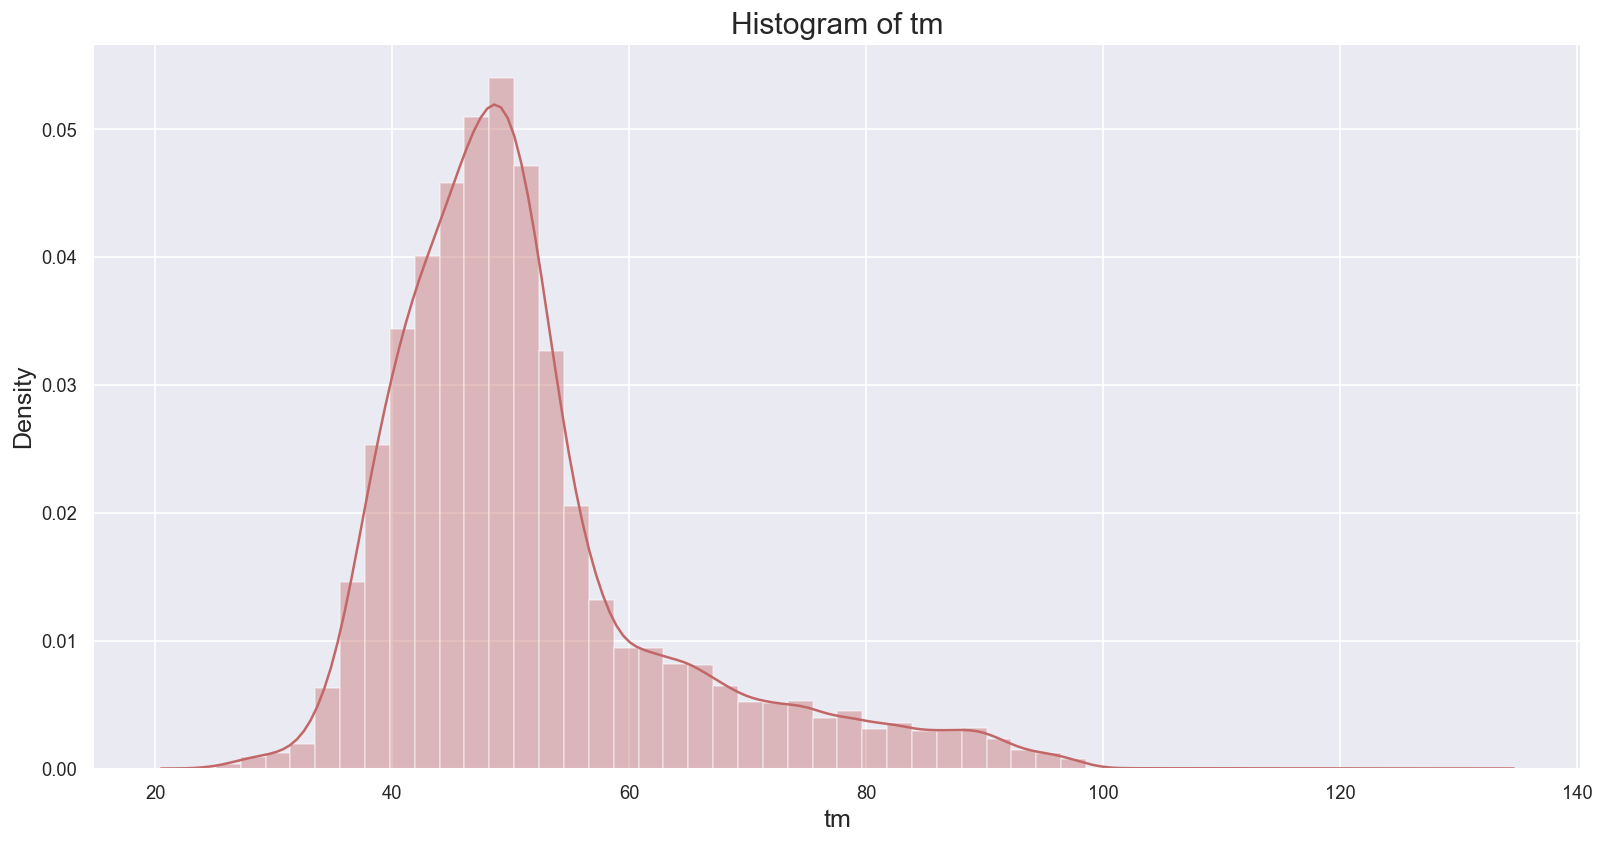

In [38]:
# check tm distribution
plt.figure(figsize=(16,8), dpi=120)
sns.set() 
ax = sns.distplot(data_updated["tm"],  color=sns.desaturate("indianred", .8))
plt.title("Histogram of tm", fontsize=18)
plt.xlabel("tm", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Relations between pH and tm')

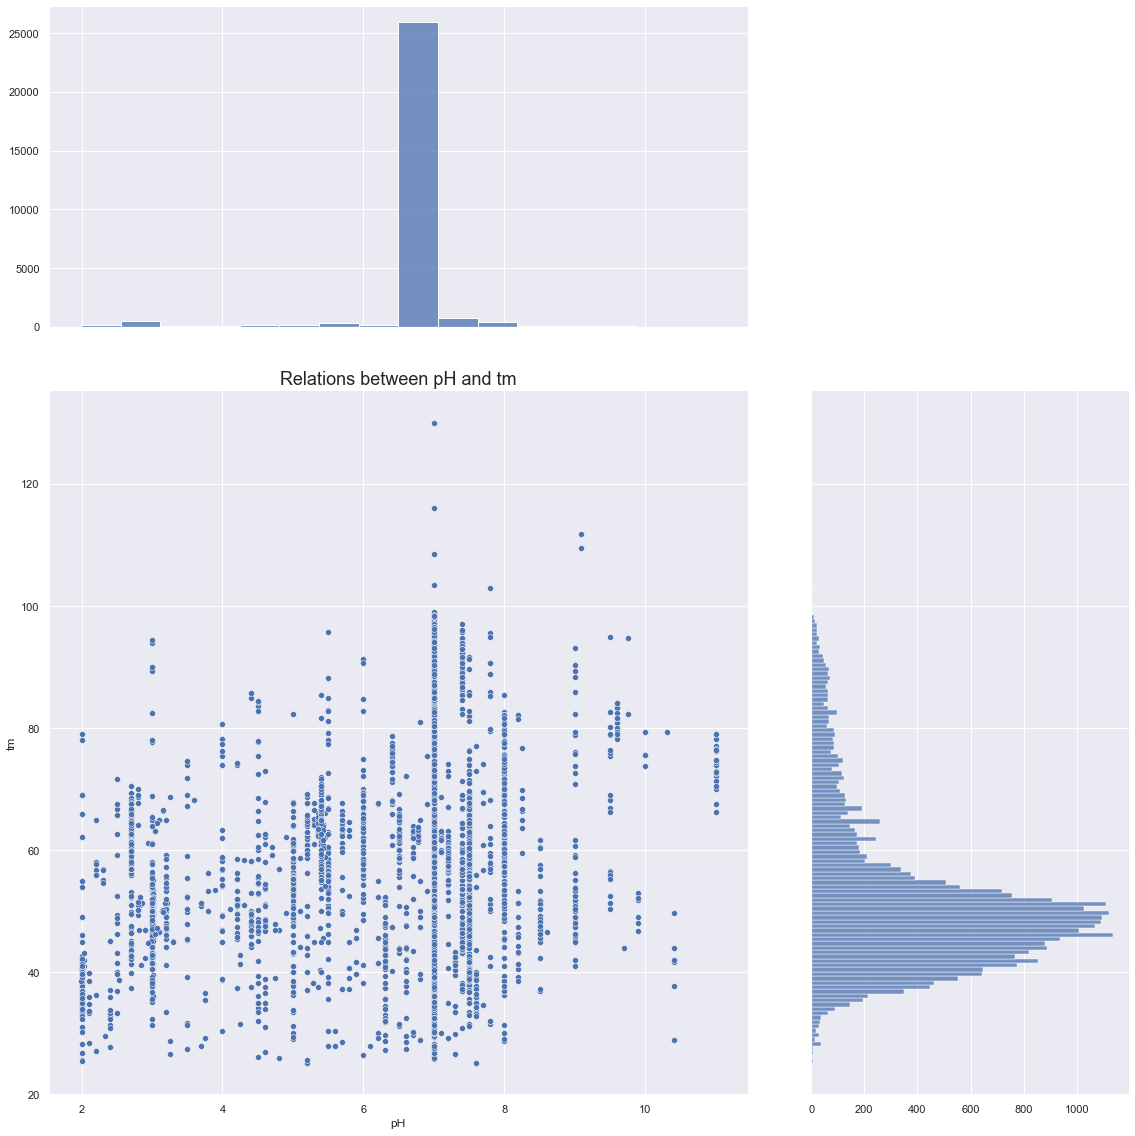

In [41]:
sns.jointplot(data=data_updated, x="pH", y="tm", height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between pH and tm', fontsize=18)

Text(0.5, 1.0, 'Relations between length and tm')

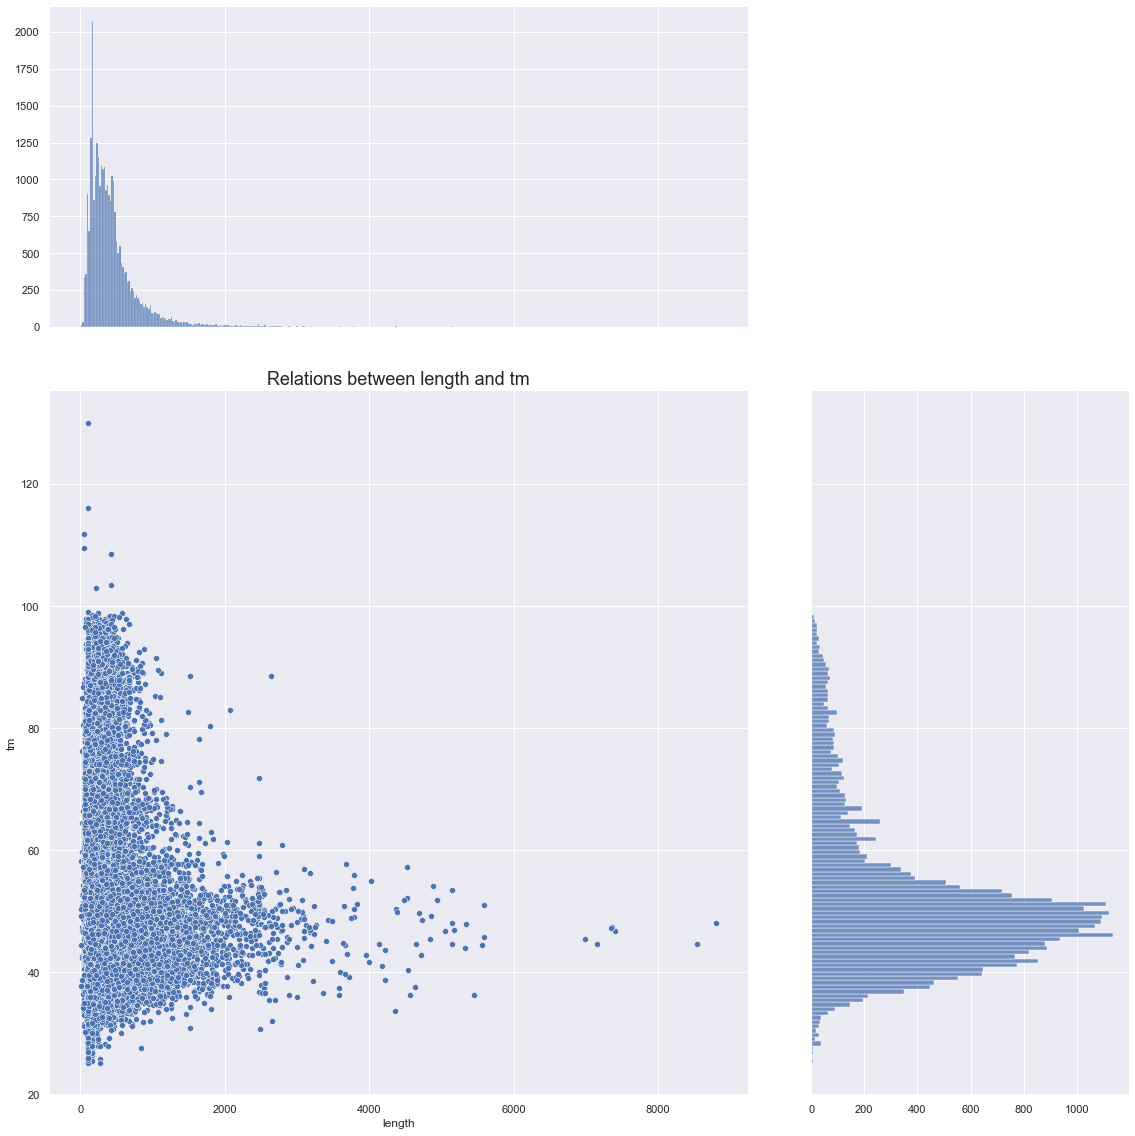

In [42]:
sns.jointplot(data=data_updated, x="length", y="tm", height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between length and tm', fontsize=18)

Text(0.5, 1.0, 'Relations between numbers of different kinds of amino acids and tm')

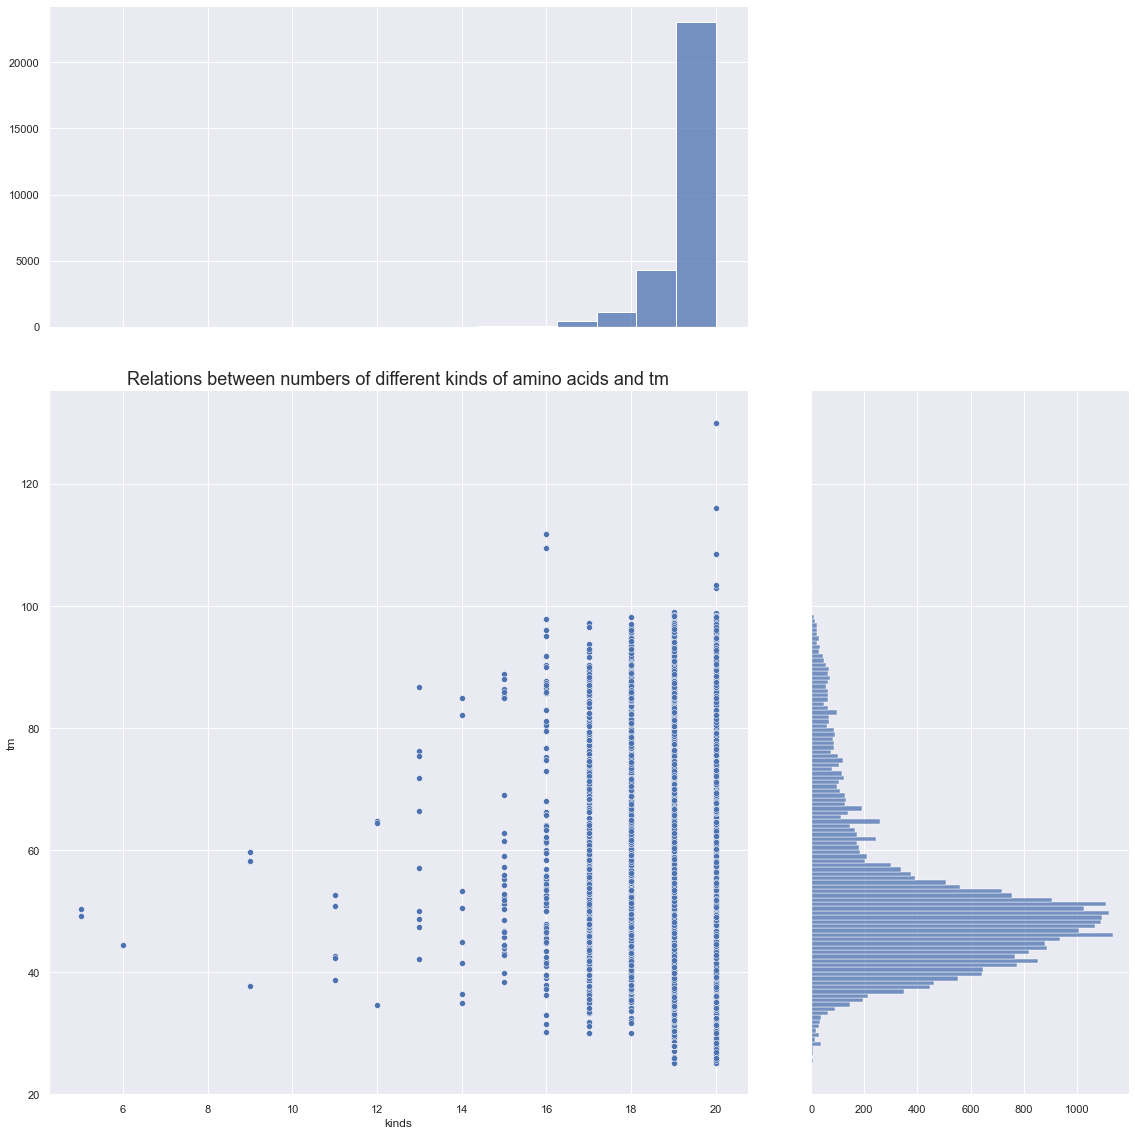

In [43]:
sns.jointplot(data=data_updated, x="kinds", y="tm", height=16, ratio=2, marginal_ticks=True)
plt.title('Relations between numbers of different kinds of amino acids and tm', fontsize=18)

## 4 Fitting the model

In [39]:
X_backup = data_updated.copy()

In [40]:
X = X_backup.drop(columns=["seq_id", "tm","protein_sequence"])
y = X_backup["tm"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [42]:
# by Benny Fung, see https://www.kaggle.com/bennyfung. Will be further discussed later, using ensembles and gridsearch methods
xgb_params = {
    'learning_rate': 0.03628302216953097,
    'subsample': 0.7875490025178,
    'colsample_bytree': 0.0137135201147,
    'max_depth': 6,
    'booster': 'gbtree', 
    'reg_lambda': 0.0008746338866473539,
    'reg_alpha': 23.13181079976304,
    'random_state':40,
    'n_estimators':5000
}

In [43]:
# for example, fitting some models to see whether features are efficient and reasonable
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
pred_knn = model_knn.predict(X_test)

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

model_xgb = xgb.XGBRegressor(**xgb_params) # with some good hyper parameters
model_xgb.fit(X_train, y_train, early_stopping_rounds=1000, eval_set=[(X_test,y_test)], verbose=50)
pred_xgb = model_xgb.predict(X_test)

[0]	validation_0-rmse:50.48195


C:\Users\ytx_q\python3.8\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-rmse:13.94086
[100]	validation_0-rmse:11.27597
[150]	validation_0-rmse:10.94686
[200]	validation_0-rmse:10.71923
[250]	validation_0-rmse:10.52212
[300]	validation_0-rmse:10.35215
[350]	validation_0-rmse:10.22204
[400]	validation_0-rmse:10.14386
[450]	validation_0-rmse:10.03242
[500]	validation_0-rmse:9.92148
[550]	validation_0-rmse:9.86652
[600]	validation_0-rmse:9.77962
[650]	validation_0-rmse:9.72402
[700]	validation_0-rmse:9.65777
[750]	validation_0-rmse:9.59202
[800]	validation_0-rmse:9.53174
[850]	validation_0-rmse:9.48912
[900]	validation_0-rmse:9.45220
[950]	validation_0-rmse:9.41243
[1000]	validation_0-rmse:9.38682
[1050]	validation_0-rmse:9.35844
[1100]	validation_0-rmse:9.32621
[1150]	validation_0-rmse:9.28059
[1200]	validation_0-rmse:9.25304
[1250]	validation_0-rmse:9.23489
[1300]	validation_0-rmse:9.20422
[1350]	validation_0-rmse:9.18033
[1400]	validation_0-rmse:9.15915
[1450]	validation_0-rmse:9.13733
[1500]	validation_0-rmse:9.12683
[1550]	validation_0-r

In [44]:
# looks okey
print("train: " + str(model_knn.score(X_train, y_train)))
print("test: " + str(model_knn.score(X_test, y_test)))

train: 0.6781380848559633
test: 0.5098588388346922


In [45]:
# looks overfitting
print("train: " + str(model_rf.score(X_train, y_train)))
print("test: " + str(model_rf.score(X_test, y_test)))

train: 0.9348131444029859
test: 0.5684516793791308


In [46]:
# looks worse than ver 1.3, but maybe eliminate the overfitting problem to some extent
print("train: " + str(model_xgb.score(X_train, y_train)))
print("test: " + str(model_xgb.score(X_test, y_test)))

train: 0.6363992473237934
test: 0.477074808474897


In [47]:
# MSE rf < knn < xgb, but consider rf's overfitting, cannot be used
for pred in [pred_knn, pred_rf, pred_xgb]:
    print(mean_squared_error(y_test, pred))

70.41540223116735
61.997748784160095
75.12527128002529


In [48]:
# try to get a prediction
preds_final = model_xgb.predict(data_test.drop(columns=["seq_id", "protein_sequence"]))
preds_final

array([53.320114, 52.257942, 52.734264, ..., 52.059963, 52.67444 ,
       51.68455 ], dtype=float32)

## 5 Submission

In [49]:
sub = pd.read_csv("sample_submission.csv")
sub

,seq_id,tm
0,31390,0
1,31391,1
2,31392,2
3,31393,3
4,31394,4
...,...,...
2408,33798,2408
2409,33799,2409
2410,33800,2410
2411,33801,2411


In [50]:
# transfer tm to ranking
sub["tm"] = preds_final
sub.sort_values(by="tm", ascending=False, inplace=True)
sub.reset_index(drop=True, inplace=True)
sub

,seq_id,tm
0,31475,55.596832
1,32143,55.336182
2,32357,55.305168
3,32153,55.175774
4,33105,55.119827
...,...,...
2408,32713,50.365971
2409,33681,50.286991
2410,33149,50.079502
2411,33589,50.079502


In [51]:
sub_final = sub.reset_index()
sub_final["tm"] = sub_final["index"]
sub_final.drop(columns=["index"], inplace=True)
sub_final

,seq_id,tm
0,31475,0
1,32143,1
2,32357,2
3,32153,3
4,33105,4
...,...,...
2408,32713,2408
2409,33681,2409
2410,33149,2410
2411,33589,2411


In [52]:
# this attempt approach gives back a score of 0.098
sub_final.to_csv(f'submission1.5.csv', index=False)
sub_final.head()

,seq_id,tm
0,31475,0
1,32143,1
2,32357,2
3,32153,3
4,33105,4


## 6 Discussion

Prediction 1.4 does not perform particularly well on the thermostability of test data, reached midway in the leaderboard months ago. However, with time passes by, now it's at 917/1399 teams of Leaderboard!

So, why this approach is far from enough?

1. lacking of further discussion for the protein_sequence;
2. lacking of more features (external dataset) conducted by the biologists and computer scientists;
    * basically works available in discussion board will get a score no more than 0.15 without external dataset, and the high score are either form the outstanding work (the 1st has reached 0.7!), or the combination of other higher score submissions (not very much contributions do they?)
3. the model itself is poorly constructed;
4. there's some tricks beneath the test dataset, sepcifically:

In [68]:
# 6.4.1 only one pH values in test data
data_test["pH"].value_counts()

8    2413
Name: pH, dtype: int64

In [69]:
# 6.4.2 they all have data_source (actually the same source)
data_test["data_source"].value_counts()

1    2413
Name: data_source, dtype: int64

In [70]:
# 6.4.3 the length in test data is very similar
data_test["length"].value_counts()

221    2336
220      77
Name: length, dtype: int64

In [71]:
data_test["protein_sequence"]

0       VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...
1       VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...
2       VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...
3       VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...
4       VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...
                              ...                        
2408    VPVNPEPDATSVENVILKTGSGDSQSDPIKADLEVKGQSALPFDVD...
2409    VPVNPEPDATSVENVLLKTGSGDSQSDPIKADLEVKGQSALPFDVD...
2410    VPVNPEPDATSVENVNLKTGSGDSQSDPIKADLEVKGQSALPFDVD...
2411    VPVNPEPDATSVENVPLKTGSGDSQSDPIKADLEVKGQSALPFDVD...
2412    VPVNPEPDATSVENVWLKTGSGDSQSDPIKADLEVKGQSALPFDVD...
Name: protein_sequence, Length: 2413, dtype: object

Actually the main feature of our model is from protein sequence. The test data contains only protein sequences with many small mutations in amino acid, so the number of individual amino acids changes very little.

### All of these signs indicate that there're rooms for improvements from both the dataset or the model, which will be discussed after mid report.